In [10]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np
import matplotlib.pyplot as plt
DRAFTPATH = '/Users/cosinga/code/hicolor_draft_two/figures/'
SAVEPATH = '/Users/cosinga/code/hcolor/fig_md_analysis/rvb/'
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/hicolor/sup_analysis/'
pplib.imports()

def fill_mean(ax, data, kwargs):
    x = data[0]
    y = np.mean(np.array([data[1], data[2]]), axis = 0)
    kwargs['alpha'] = 1
    ax.plot(x, y, **kwargs)
    return
def max_min(ys):

    for i in range(len(ys)):
        data = ys[i]
        if i == 0:
            maxs = np.ones_like(data) * data
            mins = np.ones_like(maxs) * data
        else:
            mins = np.minimum(data, mins)
            maxs = np.maximum(data, maxs)
    return mins, maxs
    
    

In [2]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/2-10_pkdatasort.pkl', 'rb'))

ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 12, slc = (-1, -1))

ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')

ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', fontsize = 16)
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67, 50])

ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            ['HI $\\times$ Red\nCross-Power', 'HI $\\times$ Blue\nCross-Power',
            'HI $\\times$ Galaxy\nCross-Power', r'Color Ratio'])
ds.displayAs('post_process', ['corr_coef', 'theory_bias', 'obs_bias'], 
             ['r', '$b_{\\mathrm{th}}$', '$b_{\\mathrm{obs}}$'])

ds.setColors('post_process', ['pink', 'lime', 'cyan'], ['corr_coef', 'theory_bias', 'obs_bias'])
ds.setColors('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])
ds.setColors('space', ['green', 'orange'], ['real', 'redshift'])
ds.setColors('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], ['vn', 'hiptl', 'hisubhalo'])
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
snapshots.reverse()
ds.setColors('snapshot', 'viridis', snapshots)

ds.setXLabel(pplib.wnum())

In [16]:
def get_bbr(SNAP, SPACE, SIM, COLOR, MODEL):
    

    HIip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
          'axis':0, 'grid_resolution':800, 'simname': SIM,
          'sim_resolution':'high', 'ptl_species':'ptl',
          'mas':'CICW', 'model':MODEL,
          'post_process':['obs_bias'], 'snapshot':SNAP, 'space':SPACE,
         'path':'fiducial', 'denominator':'ptl'}

    galip = {'is_auto':False, 'ptl_species':'ptl', 
          'axis':0, 'grid_resolution':800, 'simname': SIM, 'gal_res':'diemer',
          'gal_species':'stmass', 'sim_resolution':'high', 'mas':'CICW', 'color': COLOR,
          'post_process':'obs_bias', 'snapshot':SNAP, 'space':SPACE,
         'path':'fiducial', 'denominator':'ptl'}
    
    rip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl'], 'space':SPACE, 'gal_res':'diemer',
          'gal_species':'stmass', 'snapshot':SNAP, 'simname':SIM,
          'censat':['no key found', 'both'], 'mas':'CICW', 'color': COLOR,
         'path':'fiducial', 'model':MODEL}
    bhis = ds.getMatching(HIip)
    bgal = ds.getMatching(galip)
    rhigal = ds.getMatching(rip)
    if len(bhis) == 1:
        bhis = ds.getMatching(HIip)[0].getData()
    else:
        print('too many bhi',len(bhis))
    if len(bgal) == 1:
        bgal = ds.getMatching(galip)[0].getData()
    else:
        print('too many bgal',len(bgal))
        print(bgal)
    if len(rhigal) == 1:
        rhigal = ds.getMatching(rip)[0].getData()
    else:
        print('too many r', len(rhigal))
    
    return bhis[0], bhis[1] * bgal[1] * rhigal[1]

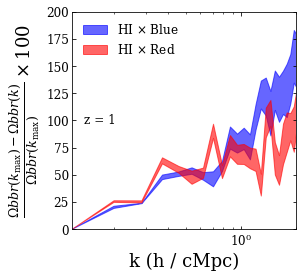

In [49]:
colors = ['blue', 'red']
pltcols = ['blue', 'red', 'gray']
labels = ['HI $\\times$ Blue', 'HI $\\times$ Red', 'All Gal.']
models = ds.getAttrVals('model')[:5]
# fig, axes = plt.subplots(1, 3)
plt.figure(figsize = (4,4))
for i, col in enumerate(colors):
    bbrs = []
    for j, mod in enumerate(models):
        
        ks, bbr = get_bbr(50, 'redshift', 'tng100', col, mod)
        bbr = np.abs(bbr[0] - bbr) / bbr[0]
        bbrs.append(bbr)
    mins, maxs = max_min(bbrs)
    plt.fill_between(ks, mins * 100, maxs * 100, color = pltcols[i], label = labels[i], alpha = 0.6)
    
    
plt.xscale('log')
plt.xlim(ks[0], 2)
plt.ylim(-0, 200)

ax = plt.gca()
ax.tick_params(which = 'both', direction = 'in', labelsize = 12, right = True, top = True)
plt.text(0.05, 0.5, 'z = 1', fontsize = 12, ha = 'left', va = 'center', transform = ax.transAxes)
plt.legend(loc = 'upper left', frameon = False, fontsize = 12)
plt.ylabel(r'$\frac{\Omega b b r (k_{\mathrm{max}}) - \Omega b b r (k)}{\Omega b b r (k_{\mathrm{max}})} \times 100$', fontsize = 18)
plt.xlabel('k (h / cMpc)', fontsize = 18)
plt.savefig(DRAFTPATH + 'obbr_error.pdf', dpi = 150)